In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
(Test_data <- read.csv("Olifants_test_data.csv"))

estuary,core,depth_1,depth_2,DBD,Corg
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Olifants,1,0,5,0.853000,0.46120000
Olifants,2,0,5,0.844650,0.30094675
Olifants,3,0,5,0.492800,1.35763209
Olifants,1,5,10,1.192133,0.50411956
Olifants,2,5,10,1.247500,0.33700787
Olifants,3,5,10,1.114550,0.27047244
Olifants,1,10,20,1.186980,0.20190476
Olifants,2,10,20,1.260380,0.09129225
Olifants,3,10,20,1.201780,0.27278885


In [3]:
xtabs(~depth_1 + core, data = Test_data)

       core
depth_1 1 2 3
     0  1 1 1
     5  1 1 1
     10 1 1 1
     20 1 1 1
     30 1 1 1

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


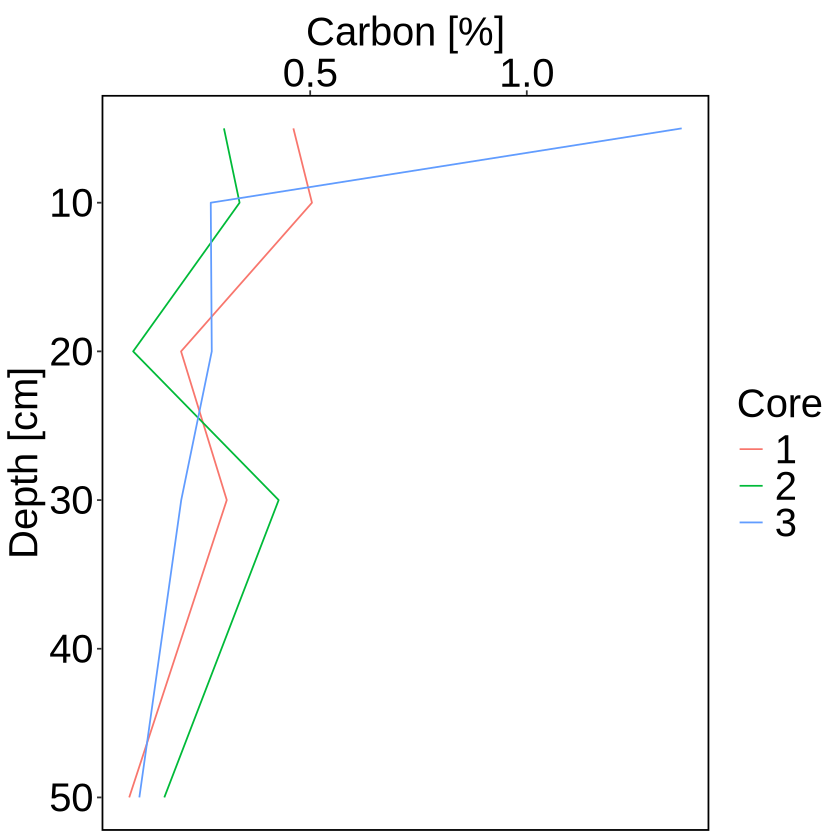

In [4]:
ggplot(data = Test_data  , aes(x = depth_2, y = Corg, color = factor(core))) +
  geom_line() +
  ylab("Carbon [%]") +
  xlab("Depth [cm]") +
  scale_y_continuous(position = "right") +
  scale_x_reverse(limits =c(50,5)) +
  theme(panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.title = element_text(size=24, colour = "black"),
        legend.text = element_text(size=24, colour = "black"),
        axis.text = element_text(size=24, colour = "black"),
        axis.title = element_text(size=24, colour = "black"),
        strip.text.x = element_text(size=24, colour = "black"),
        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
  scale_color_discrete(name = "Core") + coord_flip() 

In [5]:
#Soil carbon density (g/cm3) = dry bulk density (g/cm3) * (% Corg/100)
(soil_carbon_density <- Test_data |>
                       dplyr::mutate(Corg_DBD = DBD * Corg/100))

estuary,core,depth_1,depth_2,DBD,Corg,Corg_DBD
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Olifants,1,0,5,0.853000,0.46120000,0.003934036
Olifants,2,0,5,0.844650,0.30094675,0.002541947
Olifants,3,0,5,0.492800,1.35763209,0.006690411
Olifants,1,5,10,1.192133,0.50411956,0.006009777
Olifants,2,5,10,1.247500,0.33700787,0.004204173
Olifants,3,5,10,1.114550,0.27047244,0.003014551
Olifants,1,10,20,1.186980,0.20190476,0.002396569
Olifants,2,10,20,1.260380,0.09129225,0.001150629
Olifants,3,10,20,1.201780,0.27278885,0.003278322


In [6]:
#Amount carbon in core section (g/cm2) = Soil carbon density (g/cm3) * thickness interval (cm).
(core_section_carbon <-  soil_carbon_density |>
                        dplyr::mutate(depth_interval = depth_2 -depth_1) |>
                        dplyr::mutate(interval_carbon = depth_interval * Corg_DBD))

estuary,core,depth_1,depth_2,DBD,Corg,Corg_DBD,depth_interval,interval_carbon
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Olifants,1,0,5,0.853000,0.46120000,0.003934036,5,0.01967018
Olifants,2,0,5,0.844650,0.30094675,0.002541947,5,0.01270973
Olifants,3,0,5,0.492800,1.35763209,0.006690411,5,0.03345205
Olifants,1,5,10,1.192133,0.50411956,0.006009777,5,0.03004889
Olifants,2,5,10,1.247500,0.33700787,0.004204173,5,0.02102087
Olifants,3,5,10,1.114550,0.27047244,0.003014551,5,0.01507275
Olifants,1,10,20,1.186980,0.20190476,0.002396569,10,0.02396569
Olifants,2,10,20,1.260380,0.09129225,0.001150629,10,0.01150629
Olifants,3,10,20,1.201780,0.27278885,0.003278322,10,0.03278322


In [7]:
#Sum the amount of carbon in core sections over the recommended total sampling depth
(Corg_Core <- core_section_carbon |>
              dplyr::group_by(estuary, core) |>
              dplyr::summarise(Core_sum = sum(interval_carbon)) |>
              dplyr::ungroup())

`summarise()` has grouped output by 'estuary'. You can override using the `.groups` argument.


estuary,core,Core_sum
<chr>,<int>,<dbl>
Olifants,1,0.1319161
Olifants,2,0.1347648
Olifants,3,0.1318869


In [8]:
#Convert the total core carbon from step 3 into the units commonly used in carbon stock assessment (MgC/hectare) using the following unit conversion factors 
#(There are 1 000 000 g per Mg (megagram), and 100 000 000 cm2 per hectare)
(MG_ha_Corg_Core <- Corg_Core |>
                    dplyr::mutate(MgC_ha = Core_sum * (1/1000000) * (100000000/1)))

estuary,core,Core_sum,MgC_ha
<chr>,<int>,<dbl>,<dbl>
Olifants,1,0.1319161,13.19161
Olifants,2,0.1347648,13.47648
Olifants,3,0.1318869,13.18869


In [10]:
#Determine variability
(Olifants_Mg_ha <- MG_ha_Corg_Core |>
               dplyr::group_by(estuary) |>
               dplyr::summarise(mean_Mg_ha = mean(MgC_ha), sd_Mg_ha = sd(MgC_ha)))

estuary,mean_Mg_ha,sd_Mg_ha
<chr>,<dbl>,<dbl>
Olifants,13.28559,0.165316
